In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [74]:
data=pd.read_csv('drug_consum.csv')

In [75]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [76]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')

Original shape of data with 1885 rows and 32 columns


In [77]:
data.info

<bound method DataFrame.info of         ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700

In [78]:
data = data.drop('ID', axis=1)
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [79]:
## Cleaning

In [80]:
data.isna().sum().sum()

0

In [81]:
data.query("Semer != 'CL0'")

# We will drop overclaimers since, there answers might not truly be accurate
data = data.drop(data[data['Semer'] != 'CL0'].index)

# We will also drop unnecesary columns
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)

In [82]:
data.head()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0


In [83]:
drugs = ['Alcohol',
         'Amyl',
         'Amphet',
         'Benzos',
         'Caff',
         'Cannabis',
         'Coke',
         'Crack',
         'Ecstasy',
         'Heroin',
         'Ketamine',
         'Legalh',
         'LSD',
         'Meth',
         'Mushrooms',
         'Nicotine',
         'VSA'    ]

In [84]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [85]:
for column in drugs:
    data[column] = data[column].apply(drug_encoder)

In [86]:
data.head()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,1,0,0,1,0,0,2,2,0


In [87]:
# Checking non-numeric columns
print(data.dtypes)

Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Amyl           int64
Benzos         int64
Caff           int64
Cannabis       int64
Coke           int64
Crack          int64
Ecstasy        int64
Heroin         int64
Ketamine       int64
Legalh         int64
LSD            int64
Meth           int64
Mushrooms      int64
Nicotine       int64
VSA            int64
dtype: object


<Axes: >

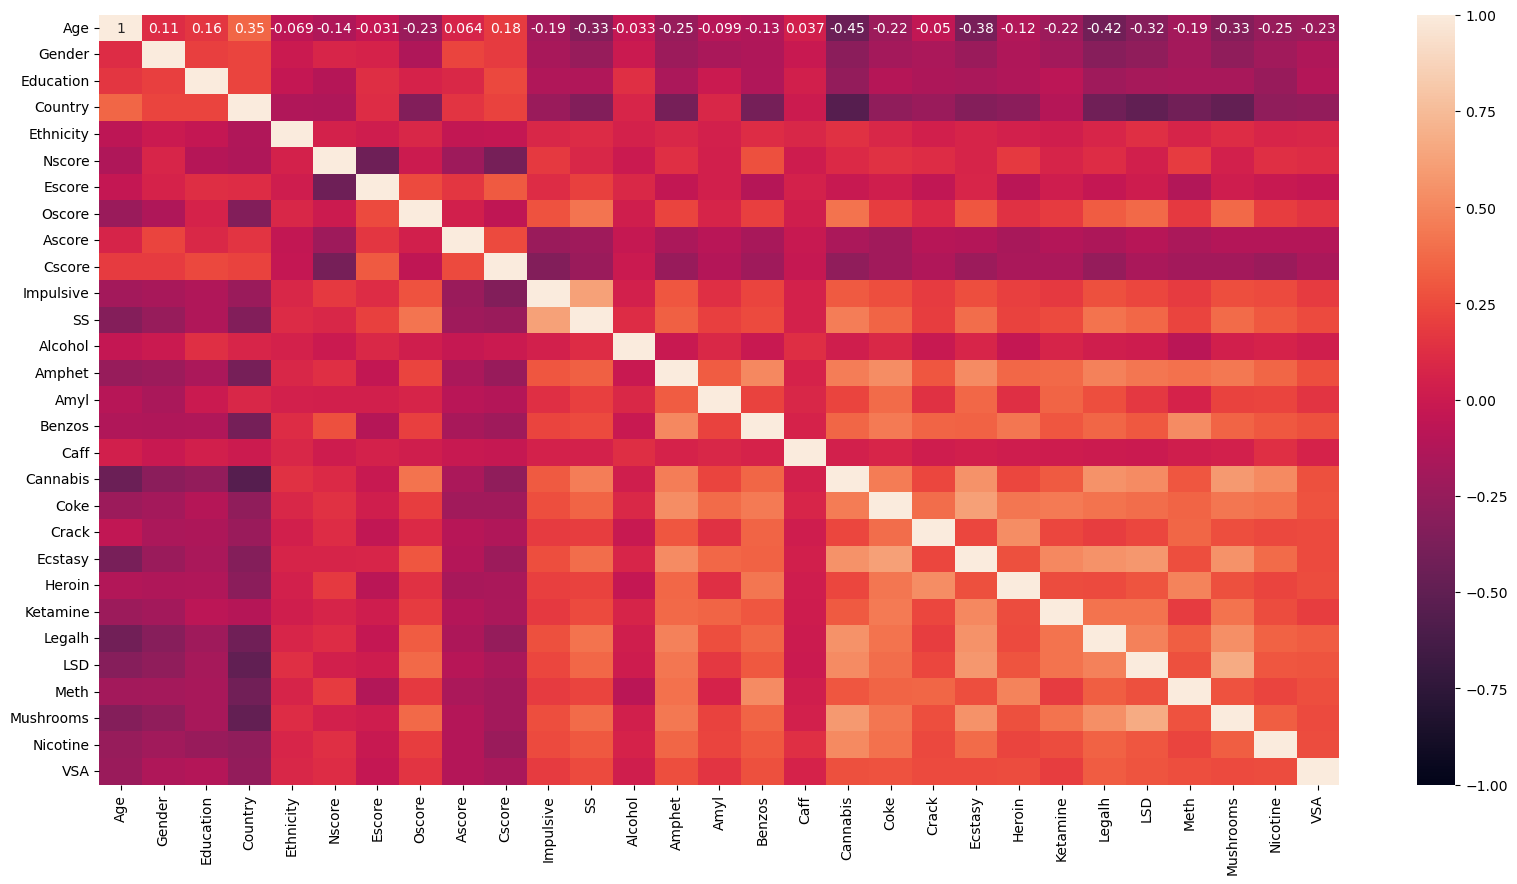

In [88]:
# Select only numeric columns for the correlation calculation
numeric_data = data.select_dtypes(include=[float, int])
corr = numeric_data.corr()



plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, vmin=-1)

In [89]:
print(f'In the new dataframe there are {data.shape[0]} rows and {data.shape[1]} columns')

In the new dataframe there are 1877 rows and 29 columns


In [90]:
# Combine cocaine and crack cocaine usage into one feature
cocaine_df = data.copy()
cocaine_df['coke_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Coke'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

In [91]:
meth_df = data.copy()
meth_df['Meth_User'] = meth_df['Meth'].apply(lambda x: 1 if x not in [0,1] else 0)
meth_df = meth_df.drop(['Meth'], axis=1)

In [92]:
heroin_df = data.copy()
heroin_df['Heroin_User'] = heroin_df['Heroin'].apply(lambda x: 1 if x not in [0,1] else 0)
heroin_df = heroin_df.drop(['Heroin'], axis=1)

In [93]:
nic_df = data.copy()
nic_df['Nicotine_User'] = nic_df['Nicotine'].apply(lambda x: 1 if x not in [0,1] else 0)
nic_df = nic_df.drop(['Nicotine'], axis=1)

In [94]:
cocaine_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Cocaine_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0


In [95]:
meth_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Mushrooms,Nicotine,VSA,Meth_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0


In [96]:
heroin_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Heroin_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0


In [97]:
nic_df.head(1)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,Nicotine_User
0,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,0,0,1


In [98]:
 def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [99]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

## Coccaine
## Model Training

In [110]:
X_train, X_test, y_train, y_test = preprocessing_inputs(cocaine_df, 'Cocaine_User')

In [111]:
X_train.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
1006,-1.121335,0.999334,-0.625288,-1.321270,-0.041143,-0.578137,1.455903,1.864458,1.263385,-0.768005,...,-0.348349,1.592103,-0.362645,-0.471348,0.925509,-0.707560,-0.505420,-0.807013,0.339376,-0.453204
58,1.217214,-1.000666,-1.272849,0.862545,-0.041143,0.225143,0.642748,-0.035252,-0.454665,-0.391968,...,2.141514,0.994367,0.616367,1.968282,0.925509,-0.033672,-0.505420,0.560173,1.167001,0.591741
1229,-1.121335,-1.000666,-0.625288,-1.321270,-0.041143,0.043966,-1.080192,-0.035252,0.277317,0.599515,...,-0.348349,0.994367,-0.362645,-0.471348,-0.760400,1.314105,1.296565,1.243766,-0.074437,-0.453204
1726,1.217214,0.999334,-0.045449,0.862545,-0.041143,-1.050581,0.809519,-0.597895,0.923057,1.477228,...,-0.348349,-0.798839,-0.362645,-0.471348,-0.760400,-0.707560,-0.505420,-0.807013,-0.488249,-0.453204
1173,-0.123241,0.999334,-0.625288,-1.321270,-0.041143,-0.465341,0.328192,0.125063,1.584393,0.137570,...,-0.348349,-0.201104,-0.362645,-0.471348,-0.760400,-0.033672,-0.505420,-0.123420,-1.315874,-0.453204


In [112]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1501, 29) (1501,)
Test set: (376, 29) (376,)


In [113]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            '        Ridge Classifier': RidgeClassifier(),
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier()}

In [114]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [115]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('  ')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 99.73%
        Ridge Classifier Accuracy: 99.73%
 Support Vector Machines Accuracy: 98.94%
Random Forest Classifier Accuracy: 100.00%
  
                  F1 SCORES
     Logisitc Regression F1-Score: 0.99611
        Ridge Classifier F1-Score: 0.99608
 Support Vector Machines F1-Score: 0.98438
Random Forest Classifier F1-Score: 1.0


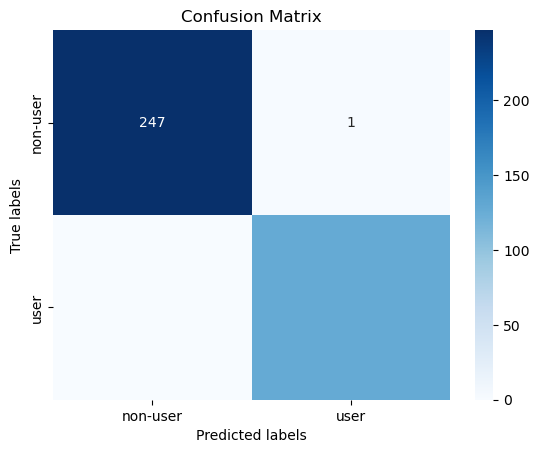

In [116]:
#Confusion Matrix

model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
plot_confusion_matrix(y_test, yhat)

## Methamphetamine

## Model Training

In [117]:
X_train, X_test, y_train, y_test = preprocessing_inputs(meth_df, 'Meth_User')

In [118]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
        Ridge Classifier trained.
 Support Vector Machines trained.
Random Forest Classifier trained.


In [119]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(name + ' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat, pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 85.11%
        Ridge Classifier Accuracy: 85.11%
 Support Vector Machines Accuracy: 84.04%
Random Forest Classifier Accuracy: 84.57%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.58824
        Ridge Classifier F1-Score: 0.56923
 Support Vector Machines F1-Score: 0.55882
Random Forest Classifier F1-Score: 0.57353
